# Introduction to the Theory of Computation

## Prof. Leandro Nunes de Castro

## Chapter 1: Finite Automata, Regular Expressions and Grammars 

## 1.1 Finite Automata

In [2]:
# Code 1: Deterministic finite automaton (DFA) that accepts strings over {0,1} where the string ends with "01"

# Define the DFA dictionary that contains the transition table
# Q = {q0,q1,q2}
# Sigma = {0,1}
delta = {
    'q0': {'0': 'q1', '1': 'q0'},
    'q1': {'0': 'q1', '1': 'q2'},
    'q2': {'0': 'q1', '1': 'q0'}
}
start_state = 'q0'
accept_states = {'q2'}

# Function to simulate DFA
def simulate_dfa(string):
    state = start_state
    for char in string:
        if char not in delta[state]:
            return False
        state = delta[state][char]
    return state in accept_states

# Get user input
user_input = input("Enter a string of 0s and 1s to test: ")

# Test the DFA with the user input
if simulate_dfa(user_input):
    print("The string is Accepted by the DFA.")
else:
    print("The string is NOT Accepted by the DFA.")


Enter a string of 0s and 1s to test:  01011


The string is NOT Accepted by the DFA.


In [5]:
# Code 2: NFA that recognizes strings over {0,1} containing a 1 in the third position from the end. 
# Q = {q1,q2,q3,q4} is the set of states, q1 is the start state, q3 is the end state.

# Define the NFA
nfa = {
    'q1': {'0': ['q1'], '1': ['q1', 'q2']},  # q1 loops on both 0 and 1; '1' also transitions to q2
    'q2': {'0': ['q3'], '1': ['q3']},        # q2 transitions to q3 on any input ('0' or '1')
    'q3': {'0': ['q4'], '1': ['q4']},        # q3 transitions to q4 on any input ('0' or '1')
    'q4': {}                                 # q4 is the accept state (terminal)
}
start_state = 'q1'
accept_states = {'q4'}

# Function to simulate the NFA
def simulate_nfa(nfa, current_states, string):
    # Base case: If the string is empty, check if any current state is an accept state
    if not string:
        return any(state in accept_states for state in current_states)

    # Get the next symbol from the input string
    symbol = string[0]
    # Remaining input string
    rest_of_string = string[1:]

    # Compute the next possible states
    next_states = set()
    for state in current_states:
        if symbol in nfa[state]:  # Check if the symbol has transitions from the current state
            next_states.update(nfa[state][symbol])

    # Recursively simulate the NFA for the next states and the rest of the string
    return any(simulate_nfa(nfa, [next_state], rest_of_string) for next_state in next_states)

# Get user input for the string to test
user_input = input("Enter a string of 0s and 1s to test the NFA: ")

# Test the NFA
if simulate_nfa(nfa, [start_state], user_input):
    print("The string is accepted by the NFA.")
else:
    print("The string is NOT accepted by the NFA.")

Enter a string of 0s and 1s to test the NFA:  0100


The string is accepted by the NFA.


## 1.2 Regular Expressions  

In [7]:
# Code 3: Check Regular Expression (regex) matching

import re

# Function to check regex match
def regex_match(string, pattern):
    return bool(re.fullmatch(pattern, string))

# Get user input for the regular expression
regex = input("Enter a regular expression: ")

# Get user input for the string to test
test_string = input("Enter a string to test against the regular expression: ")

# Test the regex with the user input
if regex_match(test_string, regex):
    print("The string matches the regular expression.")
else:
    print("The string does not match the regular expression.")

Enter a regular expression:  \d{3}-\d{3}
Enter a string to test against the regular expression:  123-456


The string matches the regular expression.


In [ ]:
# Code 4: Email validation using regex with user input

import re

# Function to validate email addresses
def validate_email(email):
    # Define the regular expression for a valid email
    email_pattern = r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$"
    
    # Use re.fullmatch to check if the entire string matches the pattern
    return bool(re.fullmatch(email_pattern, email))

# Get user input for email addresses (comma-separated)
user_input = input("Enter email addresses to validate (comma-separated): ")

# Split the input into individual email addresses
emails = [email.strip() for email in user_input.split(",")]

# Validate each email and display the result
for email in emails:
    print(f"{email}: {'Valid' if validate_email(email) else 'Invalid'}")


## 1.3 Grammars

In [8]:
# Code 5: Simulating a Grammar G that generates the language L(G) = {a^n b^(2n) | n >= 1}

# Grammar G = <V, T, P, S>

import random

# Define the grammar for L(G) = {a^n b^(2n) | n >= 1}
grammar = {
    "S": ["aBB"],  # S -> aBB
    "B": ["b", "bB"]  # B -> b | bB
}

# Function to generate valid strings from the grammar
def generate_valid_string(grammar, start_symbol, max_depth):
    if max_depth == 0:
        return ""  # Stop recursion at max depth

    production = random.choice(grammar.get(start_symbol, []))
    result = ""
    for symbol in production:
        if symbol.islower():  # Terminal
            result += symbol
        else:  # Non-terminal
            result += generate_valid_string(grammar, symbol, max_depth - 1)
    return result

# Main loop for interactive string generation
print("Generating valid strings for L(G) = {a^n b^(2n) | n >= 1}")
print("Press Enter to generate a new string. Type 'exit' to quit.")

while True:
    user_input = input("Press Enter to generate a string or 'exit' to quit: ")
    if user_input.lower() == "exit":
        print("Exiting string generation. Goodbye!")
        break

    # Generate a valid string with a maximum recursion depth
    valid_string = generate_valid_string(grammar, "S", max_depth=10)
    print(f"Generated Valid String: {valid_string}")

Generating valid strings for L(G) = {a^n b^(2n) | n >= 1}
Press Enter to generate a new string. Type 'exit' to quit.


Press Enter to generate a string or 'exit' to quit:  


Generated Valid String: abb


Press Enter to generate a string or 'exit' to quit:  


Generated Valid String: abb


Press Enter to generate a string or 'exit' to quit:  


Generated Valid String: abbbbbbb


Press Enter to generate a string or 'exit' to quit:  


Generated Valid String: abbb


Press Enter to generate a string or 'exit' to quit:  exit


Exiting string generation. Goodbye!


## 1.4 Bonus Content: Lindenmayer Systems (L-Systems)

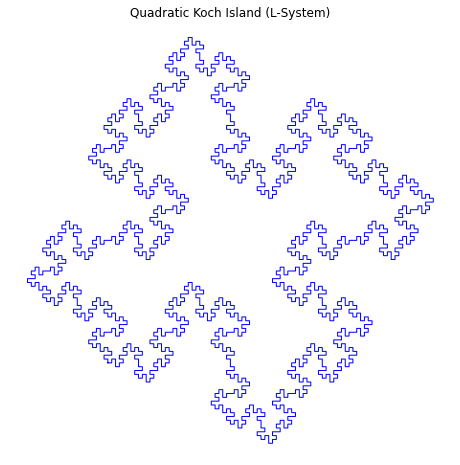

In [11]:
# Code 6: L-System to generate the Quadratic Koch Island

import matplotlib.pyplot as plt
import math

# Define the L-system parameters
axiom = "F-F-F-F"
rules = {
    'F': "F-F+F+FF-F-F+F"
}
iterations = 3  # Number of iterations
angle = 90      # Angle for turns

def apply_rules(character):
    """Apply production rules to a character."""
    return rules.get(character, character)

def generate_l_system(axiom, iterations):
    """Generate the L-system string after a given number of iterations."""
    current_string = axiom
    for _ in range(iterations):
        next_string = "".join(apply_rules(char) for char in current_string)
        current_string = next_string
    return current_string

def draw_l_system(instructions, length, angle):
    """Draw the L-system using matplotlib."""
    x, y = 0, 0  # Starting position
    current_angle = 0  # Initial direction
    points = [(x, y)]  # List of points for the path

    for command in instructions:
        if command == 'F':
            # Move forward in the current direction
            x += length * math.cos(math.radians(current_angle))
            y += length * math.sin(math.radians(current_angle))
            points.append((x, y))
        elif command == '-':
            # Turn left
            current_angle += angle
        elif command == '+':
            # Turn right
            current_angle -= angle

    return points

# Generate the L-system string
l_system_string = generate_l_system(axiom, iterations)

# Generate points for the L-system
points = draw_l_system(l_system_string, length=5, angle=angle)

# Extract x and y coordinates
x_coords, y_coords = zip(*points)

# Plot the L-system
plt.figure(figsize=(8, 8))
plt.plot(x_coords, y_coords, color='blue', linewidth=1)
plt.title("Quadratic Koch Island (L-System)")
plt.axis("equal")  # Keep aspect ratio square
plt.axis("off")    # Turn off the axes
plt.show()

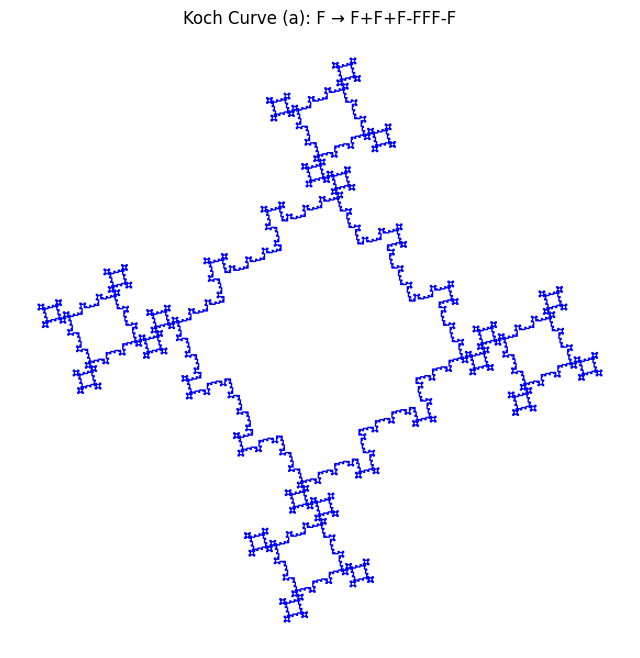

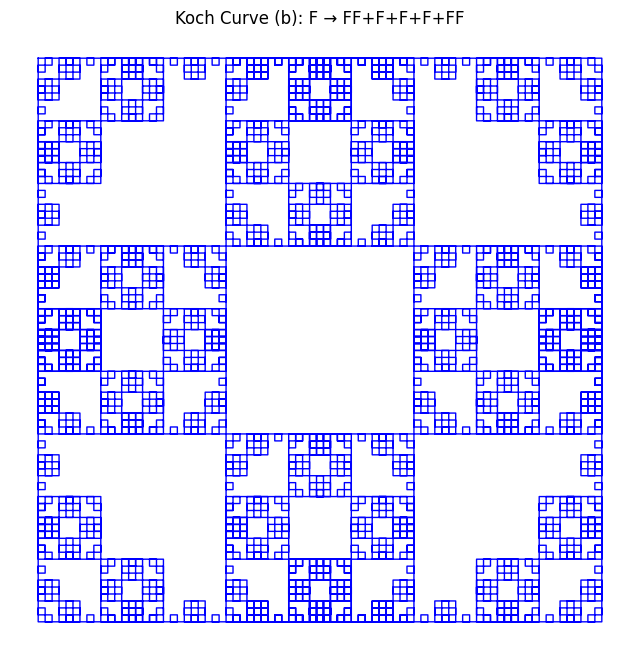

In [2]:
# Code 7: L-System to generate the Koch Curves

import matplotlib.pyplot as plt
import math

def apply_rules(character, rules):
    """Apply the production rules to a character."""
    return rules.get(character, character)

def generate_l_system(axiom, rules, iterations):
    """Generate the L-system string after a given number of iterations."""
    current_string = axiom
    for _ in range(iterations):
        current_string = "".join(apply_rules(char, rules) for char in current_string)
    return current_string

def draw_l_system(instructions, length, angle):
    """Draw the L-system using matplotlib by calculating points."""
    x, y = 0, 0  # Starting position
    current_angle = 0  # Initial direction
    points = [(x, y)]  # List of points for the path

    for command in instructions:
        if command == 'F':
            # Move forward in the current direction
            x += length * math.cos(math.radians(current_angle))
            y += length * math.sin(math.radians(current_angle))
            points.append((x, y))
        elif command == '-':
            # Turn left
            current_angle += angle
        elif command == '+':
            # Turn right
            current_angle -= angle

    return points

def plot_koch_curve(axiom, rules, iterations, length, angle, title):
    """Generate and plot the Koch curve."""
    # Generate the L-system string
    l_system_string = generate_l_system(axiom, rules, iterations)

    # Generate points for the L-system
    points = draw_l_system(l_system_string, length, angle)

    # Extract x and y coordinates
    x_coords, y_coords = zip(*points)

    # Plot the L-system
    plt.figure(figsize=(8, 8))
    plt.plot(x_coords, y_coords, color='blue', linewidth=1)
    plt.title(title)
    plt.axis("equal")  # Keep aspect ratio square
    plt.axis("off")    # Turn off the axes
    plt.show()

# Parameters
axiom = "F+F+F+F"  # Axiom
angle = 90          # Angle
iterations = 4      # Number of iterations
length = 5          # Length of each segment

# (a) Rule: F → F+F+F-FFF-F
rules_a = {
    'F': "F+F+F-FFF-F"
}

# (b) Rule: F → FF+F+F+F+FF
rules_b = {
    'F': "FF+F+F+F+FF"
}

# Plot the Koch curves
plot_koch_curve(axiom, rules_a, iterations, length, angle, "Koch Curve (a): F → F+F+F-FFF-F")
plot_koch_curve(axiom, rules_b, iterations, length, angle, "Koch Curve (b): F → FF+F+F+F+FF")

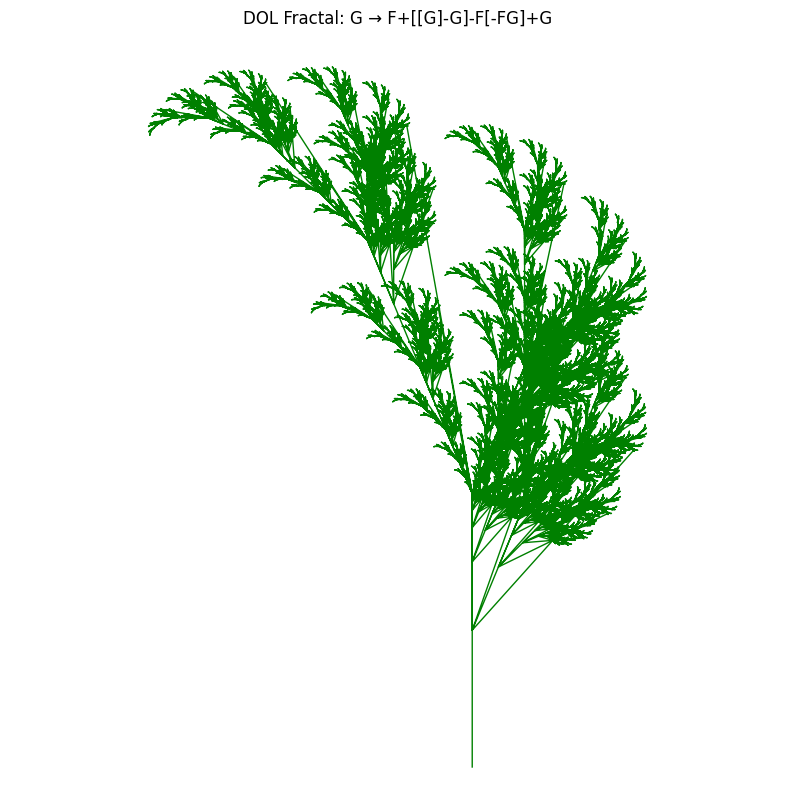

In [3]:
# Code 8: L-System to generate some fractal plants

import matplotlib.pyplot as plt
import math

def apply_rules(character, rules):
    """Apply the production rules to a character."""
    return rules.get(character, character)

def generate_l_system(axiom, rules, iterations):
    """Generate the L-system string after a given number of iterations."""
    current_string = axiom
    for _ in range(iterations):
        current_string = "".join(apply_rules(char, rules) for char in current_string)
    return current_string

def draw_l_system(instructions, length, angle):
    """Draw the L-system using matplotlib by calculating points."""
    x, y = 0, 0  # Starting position
    current_angle = 90  # Initial direction (facing upwards)
    stack = []  # Stack to store positions and angles
    points = [(x, y)]  # List of points for the path

    for command in instructions:
        if command == 'F':
            # Move forward in the current direction
            x += length * math.cos(math.radians(current_angle))
            y += length * math.sin(math.radians(current_angle))
            points.append((x, y))
        elif command == '+':
            # Turn right
            current_angle -= angle
        elif command == '-':
            # Turn left
            current_angle += angle
        elif command == '[':
            # Push the current position and angle onto the stack
            stack.append((x, y, current_angle))
        elif command == ']':
            # Pop the position and angle from the stack
            x, y, current_angle = stack.pop()
            points.append((x, y))  # Add a new segment starting here

    return points

def plot_l_system(axiom, rules, iterations, length, angle, title):
    """Generate and plot the L-system fractal."""
    # Generate the L-system string
    l_system_string = generate_l_system(axiom, rules, iterations)

    # Generate points for the L-system
    points = draw_l_system(l_system_string, length, angle)

    # Extract x and y coordinates
    x_coords, y_coords = zip(*points)

    # Plot the L-system
    plt.figure(figsize=(10, 10))
    plt.plot(x_coords, y_coords, color='green', linewidth=1)
    plt.title(title)
    plt.axis("equal")  # Keep aspect ratio square
    plt.axis("off")    # Turn off the axes
    plt.show()

# Parameters
axiom = "G"  # Axiom
rules = {
    'G': "F+[[G]-G]-F[-FG]+G",
    'F': "FF"
}
iterations = 8    # Number of iterations
angle = 22.5      # Turning angle
length = 2        # Length of each segment

# Plot the L-system fractal
plot_l_system(axiom, rules, iterations, length, angle, "DOL Fractal: G → F+[[G]-G]-F[-FG]+G")
